In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import subprocess

parameters:

phi theta
freq

rayPer_lambda

is_debug

model_file
csv_file
trace_depth

reflectance

center_relocate




In [3]:
model = "a380"
rcs_file = "../output/" + model + '_rcs.csv'
exePath = "C://development//optix//OptixRCS//build//bin//Release//RcsSpeedBranch.exe"
# start, end, step
phi = "0,360,1"
theta = "90,90,1"
freq = "3E9"
ray_per_lambda = 10
subprocess.run([exePath, str(freq), str(
    phi), str(theta), str(ray_per_lambda), model])

CompletedProcess(args=['C://development//optix//OptixRCS//build//bin//Release//RcsSpeedBranch.exe', '3E9', '0,360,1', '90,90,1', '10', 'a380'], returncode=0)

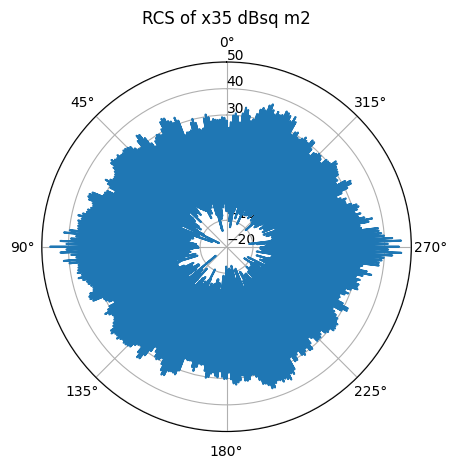

In [3]:
def rcs_diagram(model):
    rcs_file = "./output/" + model + '_rcs.csv'
    data = np.genfromtxt (rcs_file, delimiter=",")
    
    r = data[:,3]
    phi = data[:,1] / 360 * 2 * np.pi

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(phi, r)
    # ax.set_rmax(80)
    # ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
    ax.set_rlabel_position(0)  # Move radial labels away from plotted line
    ax.set_theta_zero_location("N")    
    ax.grid(True)
    title = "RCS of " + model + " dBsq m2"
    ax.set_title(title, va='bottom')
    plt.show()

rcs_diagram("x35")

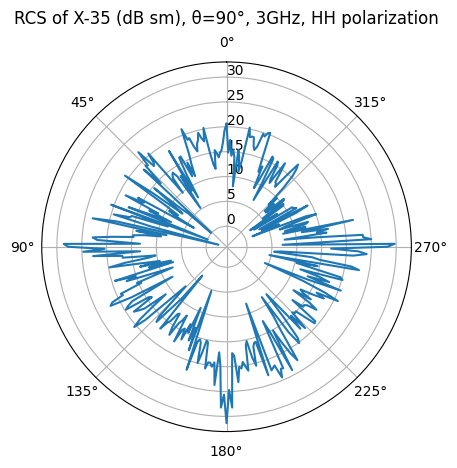

In [34]:
rcs_file = "./output/" + "x35_every_phi.csv"

data = np.genfromtxt (rcs_file, delimiter=",")

r = data[:,3]
phi = data[:,1] / 360 * 2 * np.pi
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(phi, r)
# ax.set_rmax(80)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(0)  # Move radial labels away from plotted line
ax.set_theta_zero_location("N")    
ax.grid(True)
title = "RCS of X-35 (dB sm), θ=90°, 3GHz, HH polarization"
ax.set_title(title, va='bottom')
plt.show()
fig.savefig('x35.png', transparent=True)


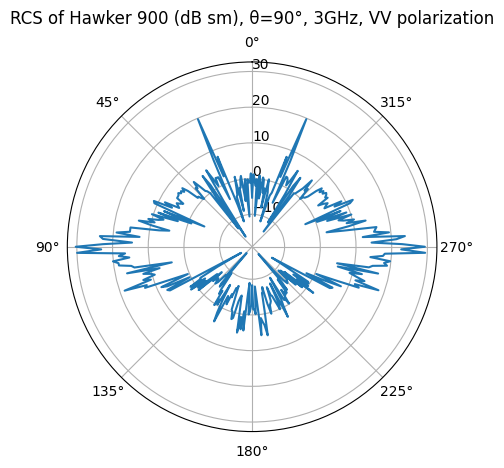

In [36]:
# rcs_diagram("hawker_800")
rcs_file = "./output/hawker_phi_angle.csv"

data = np.genfromtxt (rcs_file, delimiter=",")

r = data[:,3]
phi = data[:,1] / 360 * 2 * np.pi
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(phi, r)
# ax.set_rmax(80)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(0)  # Move radial labels away from plotted line
ax.set_theta_zero_location("N")    
ax.grid(True)
title = "RCS of Hawker 900 (dB sm), θ=90°, 3GHz, VV polarization"
ax.set_title(title, va='bottom')
plt.show()
fig.savefig('hawker-900.png', transparent=True)


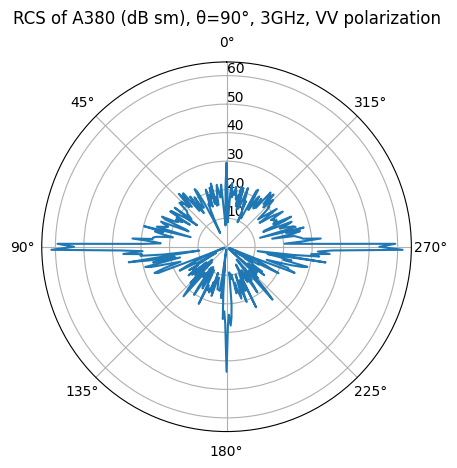

In [37]:
# rcs_diagram("hawker_800")
rcs_file = "./output/a380_phi_angle.csv"

data = np.genfromtxt (rcs_file, delimiter=",")

r = data[:,3]
phi = data[:,1] / 360 * 2 * np.pi
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(phi, r)
# ax.set_rmax(80)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(0)  # Move radial labels away from plotted line
ax.set_theta_zero_location("N")    
ax.grid(True)
title = "RCS of A380 (dB sm), θ=90°, 3GHz, VV polarization"
ax.set_title(title, va='bottom')
plt.show()
fig.savefig('a380.png', transparent=True)

In [9]:
def visualize(model):
    rcs_file = "./output/" + model + '_rcs.csv'
    data = np.genfromtxt (rcs_file, delimiter=",")
    # ignore freq
    data=data[:,1:]
    rows, row_pos = np.unique(data[:, 0], return_inverse=True)
    cols, col_pos = np.unique(data[:, 1], return_inverse=True)

    pivot_table = np.zeros((len(rows), len(cols)), dtype=data.dtype)
    pivot_table[row_pos, col_pos] = data[:, 2]
    pivot_table = pivot_table.T
    fig, ax = plt.subplots(figsize=(14, 6))
    ax = sns.heatmap(pivot_table, cmap="Spectral", square=True)
    title = 'RCS of '+model
    ax.set_title(title, weight='bold')
    ax.set_xlabel('Azimuth in Degree')
    ax.set_ylabel('Polar Angle in Degree')
    ax.collections[0].colorbar.set_label("RCS in dBsqm2")
    plt.show()

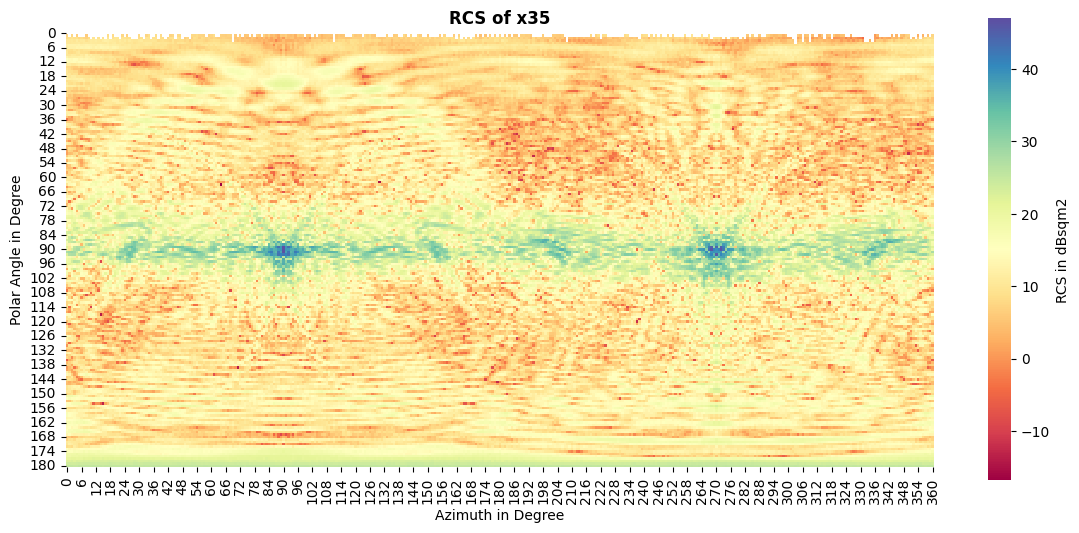

In [10]:
visualize("x35")

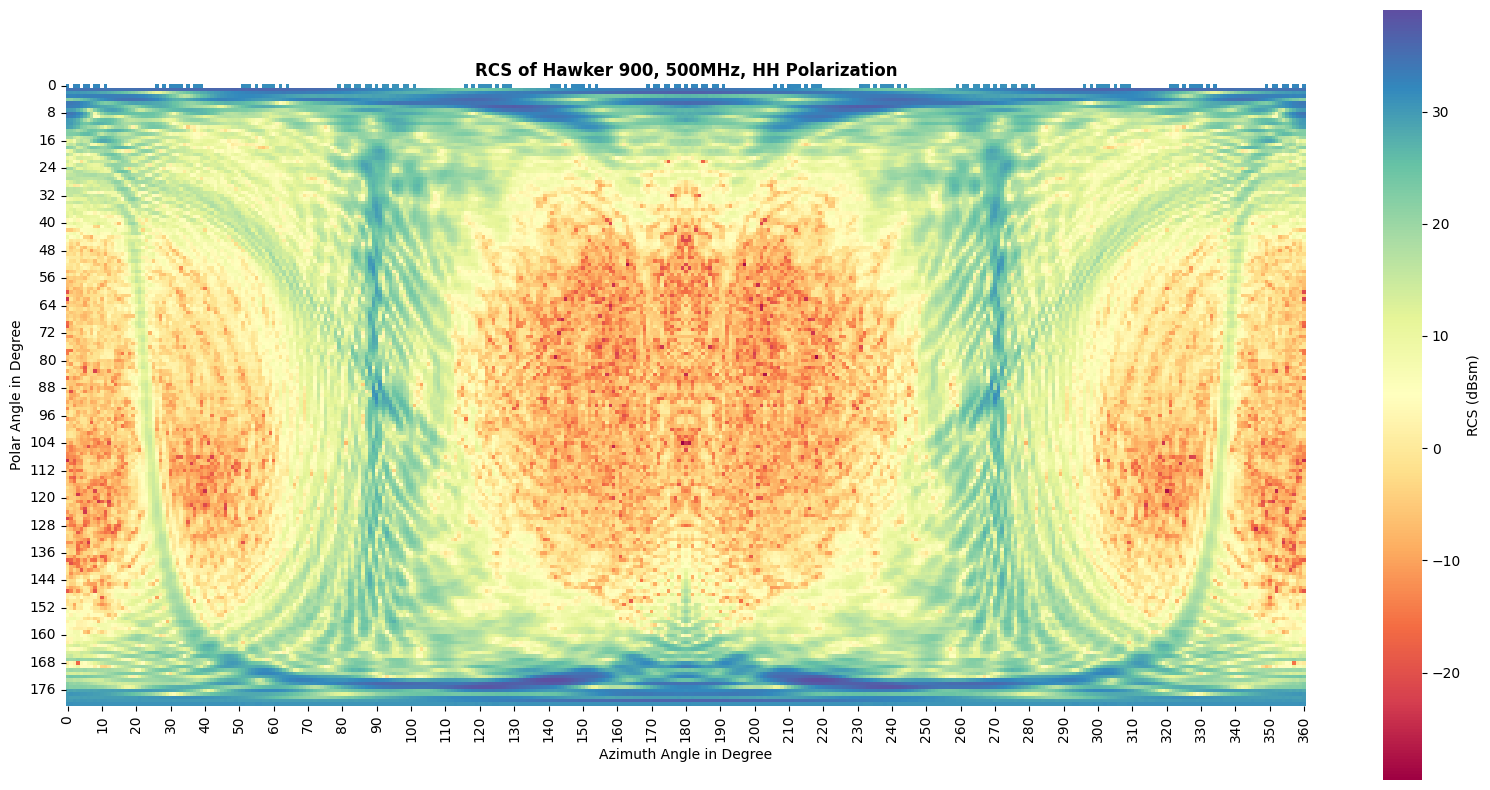

In [28]:
rcs_file = "./output/" + "hawker_every_angle.csv"
data = np.genfromtxt (rcs_file, delimiter=",")
# ignore freq
data=data[:,1:]
rows, row_pos = np.unique(data[:, 0], return_inverse=True)
cols, col_pos = np.unique(data[:, 1], return_inverse=True)
pivot_table = np.zeros((len(rows), len(cols)), dtype=data.dtype)
pivot_table[row_pos, col_pos] = data[:, 2]
pivot_table = pivot_table.T
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(pivot_table, cmap="Spectral", square=True)
title = 'RCS of Hawker 900, 500MHz, HH Polarization'
ax.set_title(title, weight='bold')

ax.set_xticks(ax.get_xticks()[::2])
ax.set_yticks(ax.get_yticks()[::2])

ax.set_xlabel('Azimuth Angle in Degree')
ax.set_ylabel('Polar Angle in Degree')
ax.collections[0].colorbar.set_label("RCS (dBsm)")
plt.show()

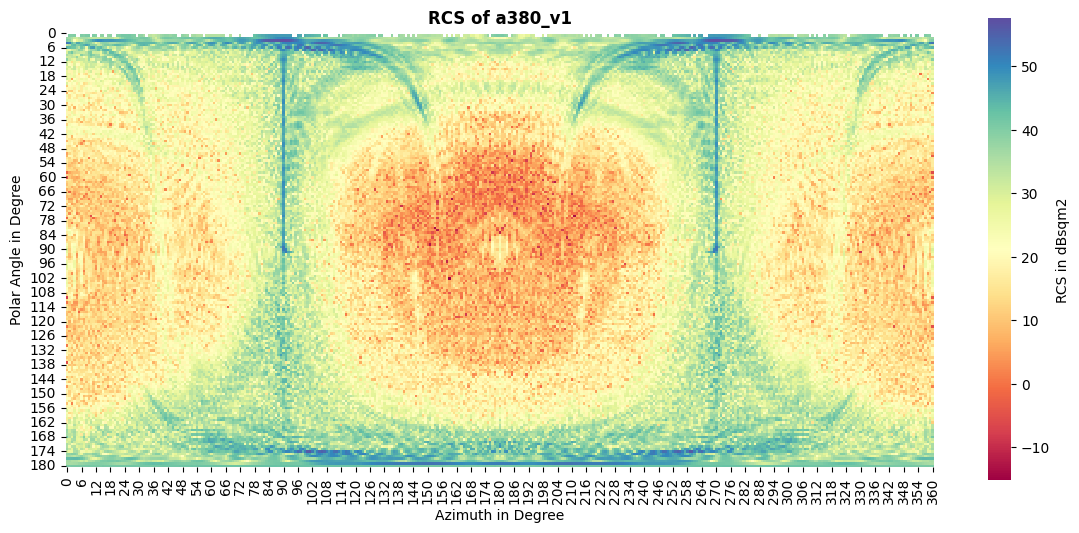

In [12]:
visualize("a380_v1")